In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [3]:
%config InlineBackend.figure_format = 'retina'


In [4]:
plt.rcParams["axes.spines.right"] = False
plt.rcParams["axes.spines.top"] = False
plt.rcParams["axes.labelsize"] = 16
plt.rcParams["xtick.labelsize"] = 12
plt.rcParams["ytick.labelsize"] = 12
plt.rcParams["figure.titlesize"] = 18
plt.rcParams["axes.titlesize"] = 18

In [5]:
RANDOM_SEED = 666
np.random.seed(RANDOM_SEED)

In [25]:
bikes = pd.read_csv("../data/jay_st_bikes.csv")
bikes.head()

,name,num_bikes_available,last_reported
0,Jay St & Tech Pl,0,86400
1,Jay St & Tech Pl,0,86400
2,Jay St & Tech Pl,0,86400
3,Jay St & Tech Pl,0,86400
4,Jay St & Tech Pl,0,86400


In [26]:
bikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 732532 entries, 0 to 732531
Data columns (total 3 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   name                 732532 non-null  object
 1   num_bikes_available  732532 non-null  int64 
 2   last_reported        732532 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 16.8+ MB


In [27]:
bikes["last_reported"] = pd.to_datetime(bikes["last_reported"], unit="s", origin="unix", utc=True).dt.tz_convert("US/Eastern")

In [28]:
bikes.head()

,name,num_bikes_available,last_reported
0,Jay St & Tech Pl,0,1970-01-01 19:00:00-05:00
1,Jay St & Tech Pl,0,1970-01-01 19:00:00-05:00
2,Jay St & Tech Pl,0,1970-01-01 19:00:00-05:00
3,Jay St & Tech Pl,0,1970-01-01 19:00:00-05:00
4,Jay St & Tech Pl,0,1970-01-01 19:00:00-05:00


In [29]:
bikes.tail()

,name,num_bikes_available,last_reported
732527,Jay St & Tech Pl,25,2022-10-13 22:12:04-04:00
732528,Jay St & Tech Pl,25,2022-10-13 22:12:04-04:00
732529,Jay St & Tech Pl,25,2022-10-13 22:12:04-04:00
732530,Jay St & Tech Pl,25,2022-10-13 22:12:04-04:00
732531,Jay St & Tech Pl,25,2022-10-13 22:12:04-04:00


In [31]:
bikes = bikes[bikes["last_reported"] >= "1971-01-01"]

In [32]:
bikes["last_reported"].min()

Timestamp('2019-12-31 17:33:10-0500', tz='US/Eastern')

In [33]:
bikes.head()

,name,num_bikes_available,last_reported
220,Jay St & Tech Pl,30,2019-12-31 17:33:10-05:00
221,Jay St & Tech Pl,30,2019-12-31 17:33:10-05:00
222,Jay St & Tech Pl,30,2019-12-31 17:33:10-05:00
223,Jay St & Tech Pl,30,2019-12-31 17:33:10-05:00
224,Jay St & Tech Pl,30,2019-12-31 17:33:10-05:00


In [34]:
bikes = bikes.set_index("last_reported").drop(columns="name")

In [35]:
bikes.head()

,num_bikes_available
last_reported,
2019-12-31 17:33:10-05:00,30
2019-12-31 17:33:10-05:00,30
2019-12-31 17:33:10-05:00,30
2019-12-31 17:33:10-05:00,30
2019-12-31 17:33:10-05:00,30


In [37]:
bikes.index

DatetimeIndex(['2019-12-31 17:33:10-05:00', '2019-12-31 17:33:10-05:00',
               '2019-12-31 17:33:10-05:00', '2019-12-31 17:33:10-05:00',
               '2019-12-31 17:33:10-05:00', '2019-12-31 17:33:10-05:00',
               '2019-12-31 17:33:10-05:00', '2019-12-31 17:33:10-05:00',
               '2019-12-31 17:33:10-05:00', '2019-12-31 17:33:10-05:00',
               ...
               '2022-10-13 22:12:04-04:00', '2022-10-13 22:12:04-04:00',
               '2022-10-13 22:12:04-04:00', '2022-10-13 22:12:04-04:00',
               '2022-10-13 22:12:04-04:00', '2022-10-13 22:12:04-04:00',
               '2022-10-13 22:12:04-04:00', '2022-10-13 22:12:04-04:00',
               '2022-10-13 22:12:04-04:00', '2022-10-13 22:12:04-04:00'],
              dtype='datetime64[ns, US/Eastern]', name='last_reported', length=732312, freq=None)

<AxesSubplot: title={'center': 'Number of Bikes'}, xlabel='last_reported'>

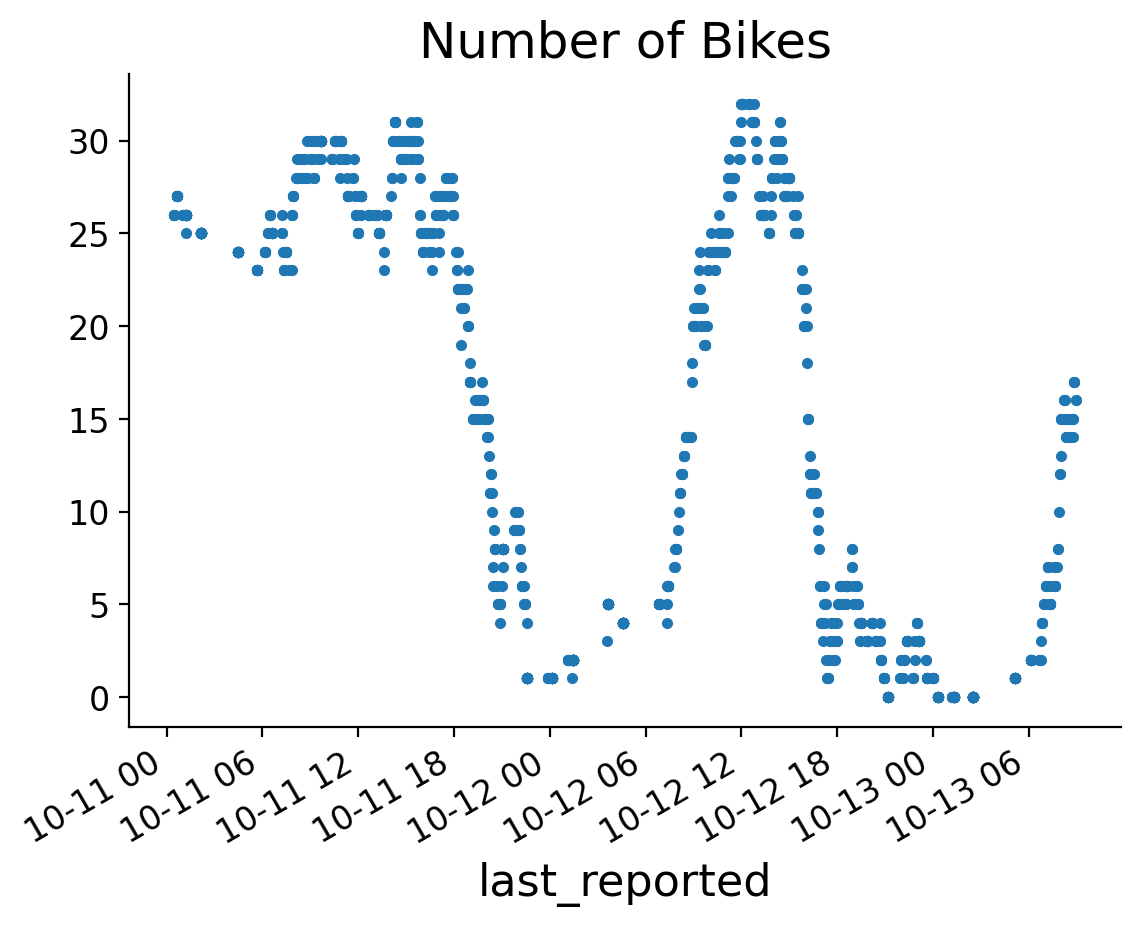

In [69]:
bikes.loc["2022-10-11":"2022-10-13 09:00:00", "num_bikes_available"].plot(linestyle="none", marker=".", title="Number of Bikes")


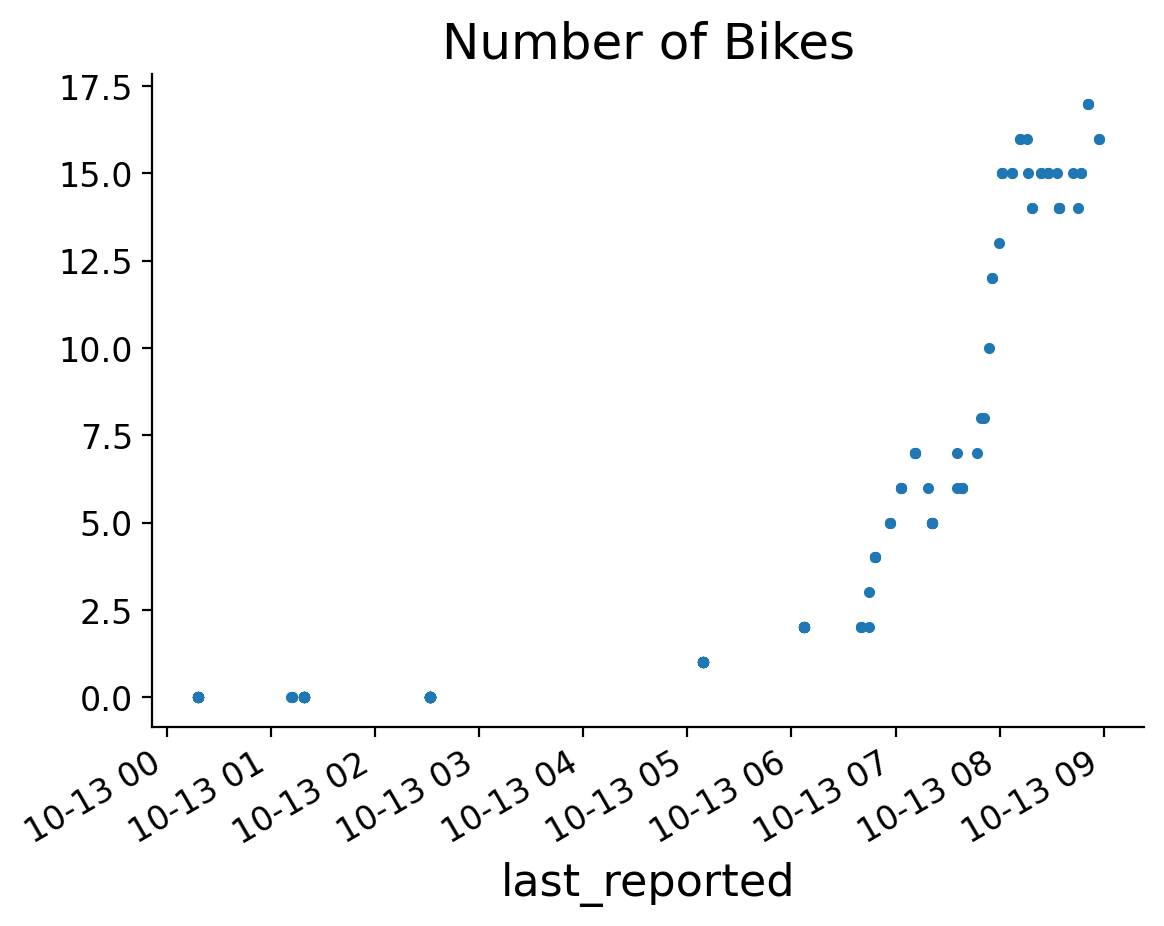

In [70]:
bikes.loc["2022-10-13":"2022-10-13 09:00:00", "num_bikes_available"].plot(linestyle="none", marker=".", title="Number of Bikes")
None

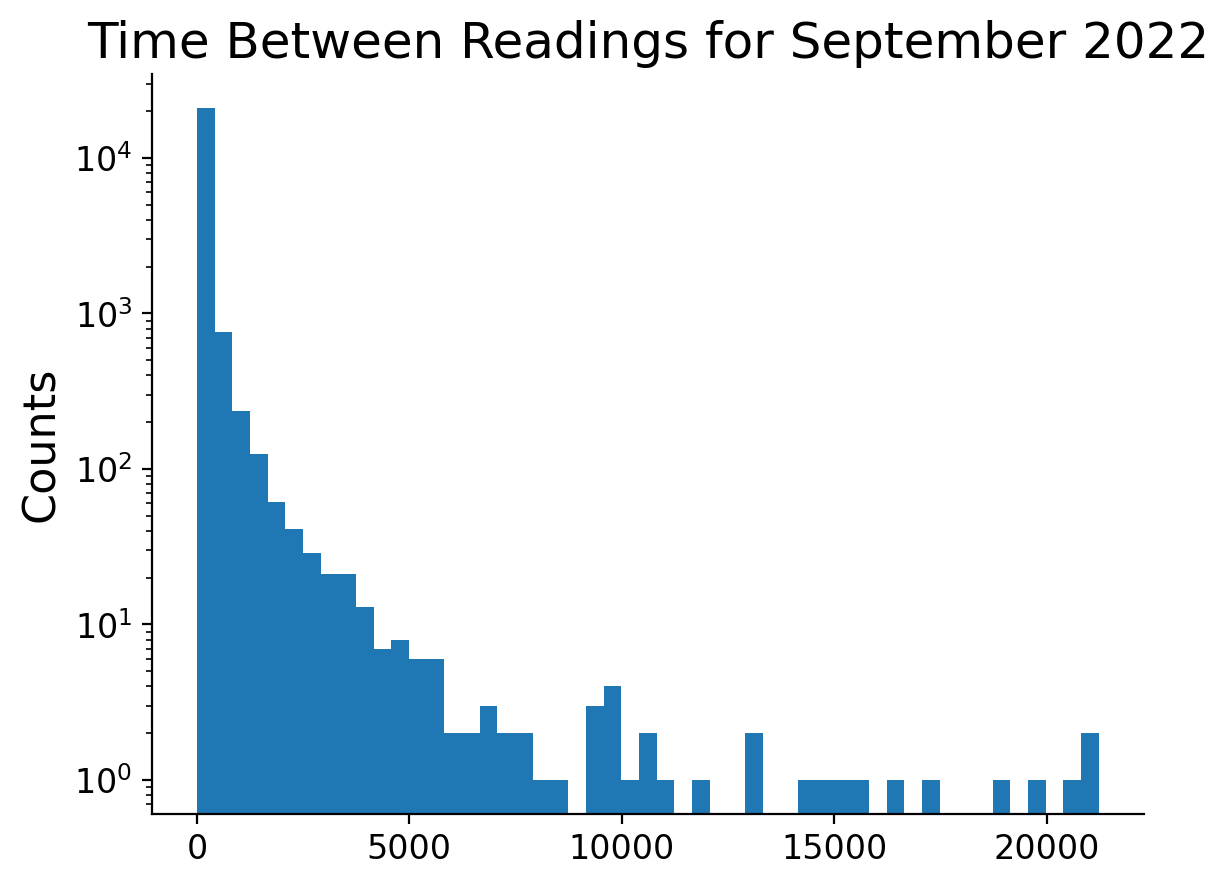

In [66]:
window = slice("2022-09-01", "2022-10-01")

fig, ax = plt.subplots()
ax.hist((bikes.loc[window].index[1:] - bikes.loc[window].index[:-1]).total_seconds(), bins=51)
ax.semilogy()
ax.set_title("Time Between Readings for September 2022")
ax.set_ylabel("Counts")
None